<a href="https://colab.research.google.com/github/Vijay1232132/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Bank Marketing Effectiveness Prediction


##### **Project Type**    - Classification
##### **Contribution**    - Individual
#####   Team Member 1 - J  Vijay Kumar

## **Project Summary -**

Aim of this project is whether a client is going to subscribe a term deposit or not.
I have loaded the data into dataframe and explored the data analysis.
I have implemented various classification models to find insights for the various features/attributes  and came to conclusion to this project in order to answer business requirements

# **GitHub Link -**

https://github.com/Vijay1232132/Bank-Marketing-Effectiveness-Prediction

# **Problem Statement**

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

## <b> Problem Description </b>

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


# ***Let's Begin !***

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student',  'technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
- y - has the client subscribed a term deposit? (binary: 'yes','no')


-----



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data=pd.read_csv('/content/drive/MyDrive/bank-full.csv',sep=';')
df = Data.copy()

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# Shape of the Dataset
df.shape

(45211, 17)

We have 4521 rows and 17 columns in our banking dataset.

In [7]:
# Information About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### **Checking null values**

In [9]:
# checking the null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no null values in the dataset

In [10]:
# checking unique values
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
# checking the duplicate values in our data
df.duplicated().value_counts()

False    45211
dtype: int64

# **Descriptive Analysis**

-- We have two types of variables in our data set. These are Continuous Variables and Categorical Variables.

In [12]:
# some important statistical description of feature in our dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [14]:
# List of numeric columns
numerical_columns = list(df.select_dtypes(exclude=['object']))
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
# List of Categorical columns
categorical_columns = list(df.select_dtypes(include=['object']))
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

# **EDA on Dataset**

##**Target Variable**

Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 is considered ideal

Let’s see how our target variable i.e. y distribution looks like.

Target Variable : y - has the client subscribed a term deposit? (binary: 'yes','no')

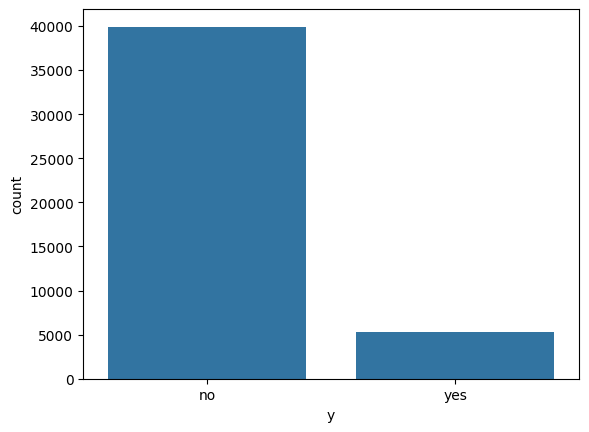

In [16]:
# Visualize the target variable
g = sns.countplot(x=df['y'])

As We Can See that Data is highly imbalanced.

Majority of the data points belong to no class. Ratio of No class to yes class is 8:1

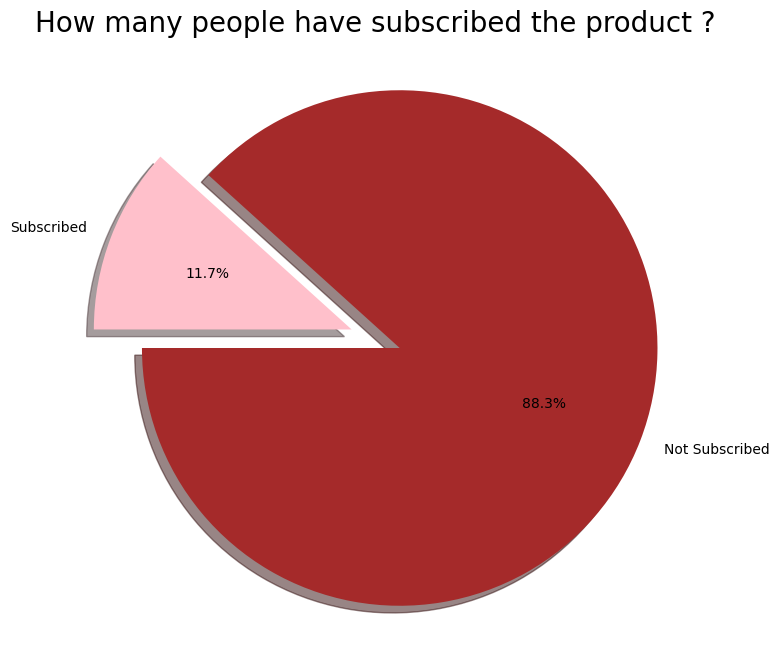

In [17]:
# visualising how many customers have subscribed

labels = 'Not Subscribed', 'Subscribed'
sizes = df.y.value_counts()
colors = ['brown', 'pink']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How many people have subscribed the product ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()


Only 11.7% people have subscribed to our product

# **Univariate Analysis**

Let’s start doing EDA on rest of the columns of the datapoints.

###Categorical Features Exploration

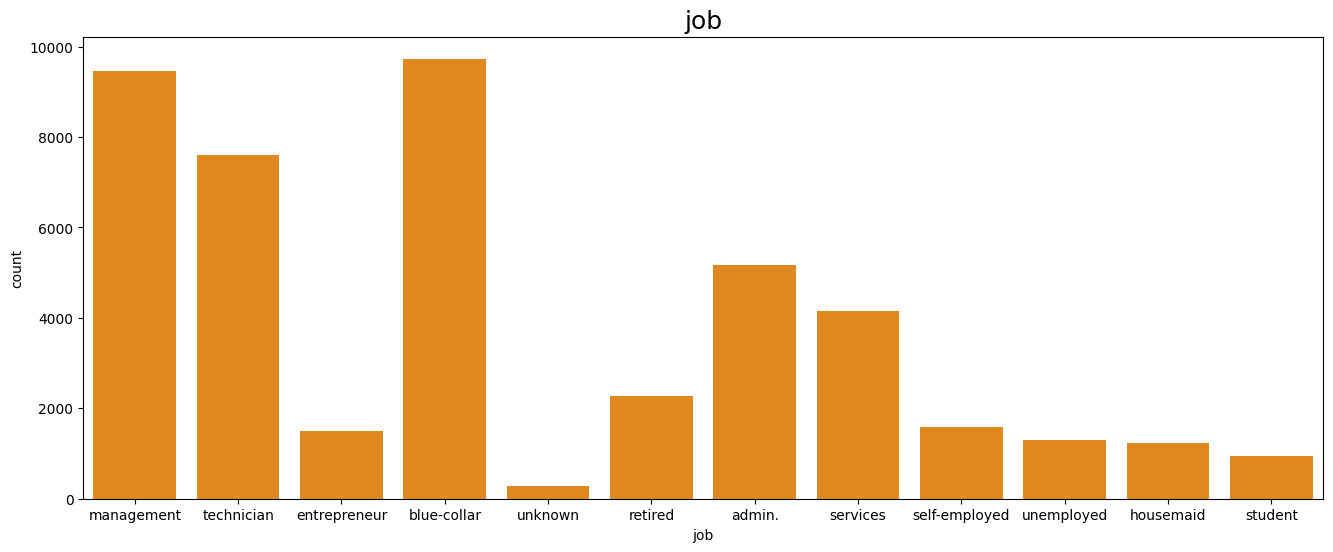

In [18]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['job'],color = 'DarkOrange')
plt.title('job', fontsize=18)
plt.show()

We have type of job :- (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’).

There exists around 12 different type of job profiles.

Top 3 job profiles are blue-collar, managment and technician which contains 60% of the total records.

From the above distribution we can see that most of the customers have jobs as "management", "blue-collar" or "technician". One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have subscribed a term deposit

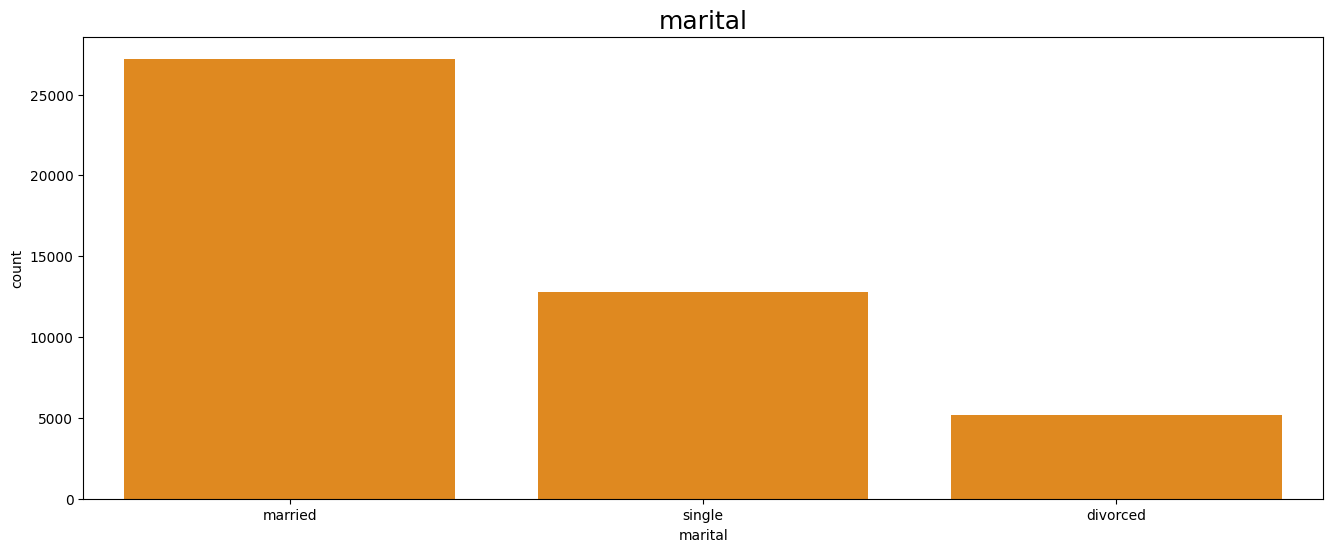

In [19]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['marital'], color = 'DarkOrange')
plt.title('marital', fontsize=18)
plt.show()


marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)

Around 60% of our client base is married, 28% is single and 12% are divorced

Client who married are high in records in given dataset and divorced are less

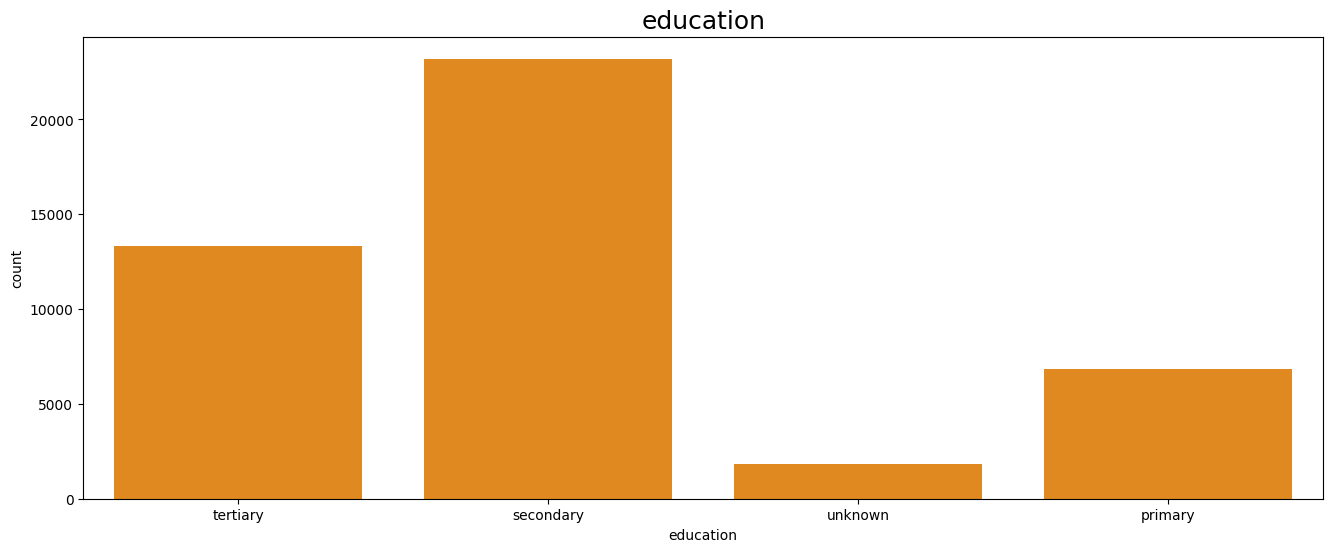

In [20]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['education'], color = 'DarkOrange')
plt.title('education', fontsize=18)
plt.show()

Client whose education background is secondary are in high numbers in given dataset

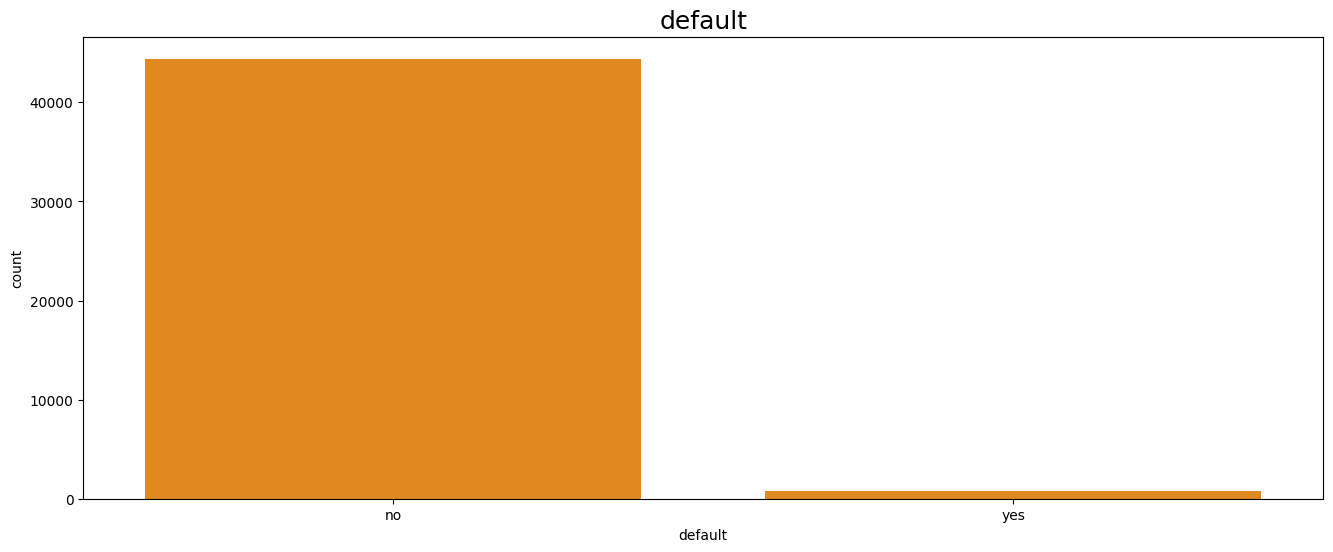

In [21]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['default'], color = 'DarkOrange')
plt.title('default', fontsize=18)
plt.show()

Column default says that client has credit in default or not. It has categorical value: 'no', 'yes', 'unknown'.
vast majority of client base is non defaulters


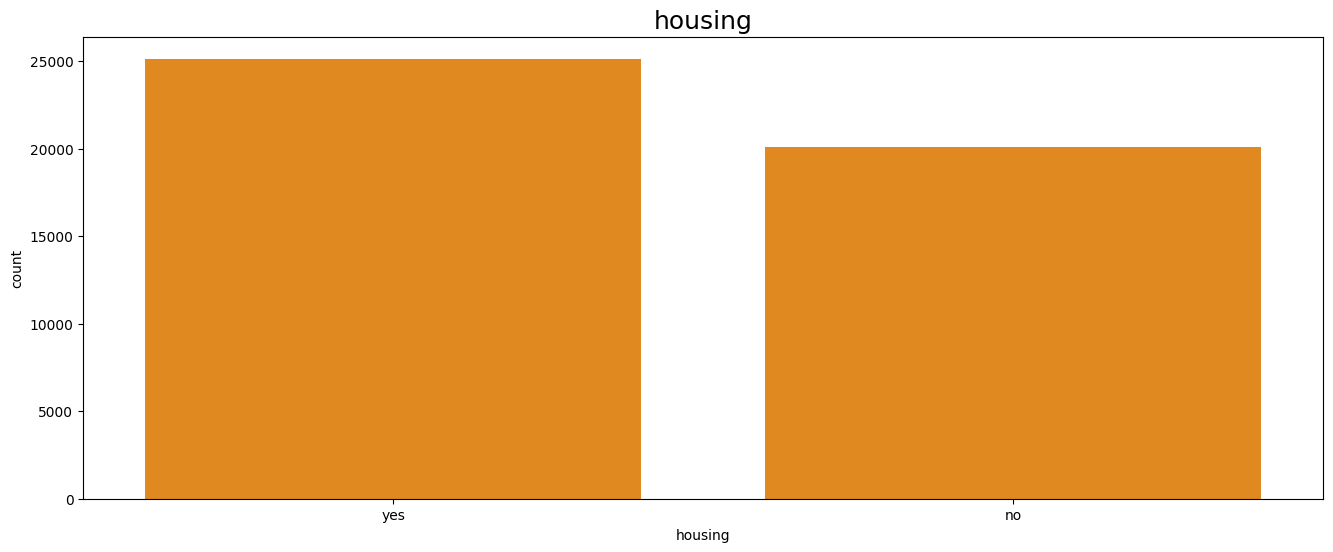

In [22]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['housing'], color = 'DarkOrange')
plt.title('housing', fontsize=18)
plt.show()

People with housing loan are the most ones who have been contacted by the bank followed by people with no housing loan.

Most of the client has taken the housing loan.

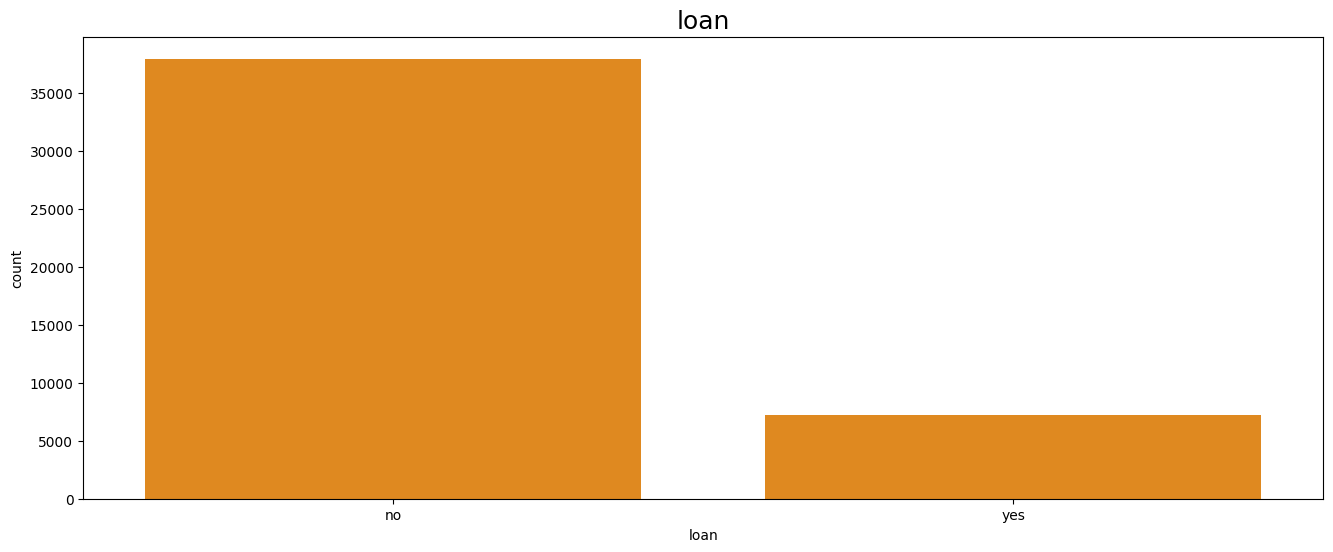

In [23]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['loan'], color = 'DarkOrange')
plt.title('loan', fontsize=18)
plt.show()

As per data, some client has taken the personal loan.

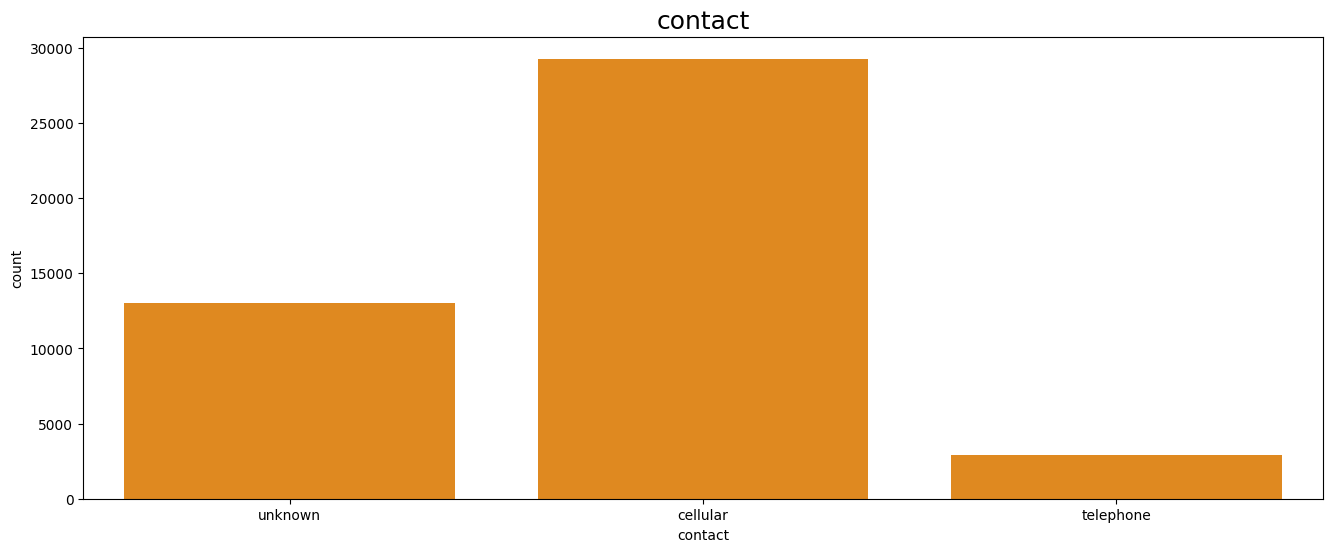

In [24]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['contact'], color = 'DarkOrange')
plt.title('contact', fontsize=18)
plt.show()

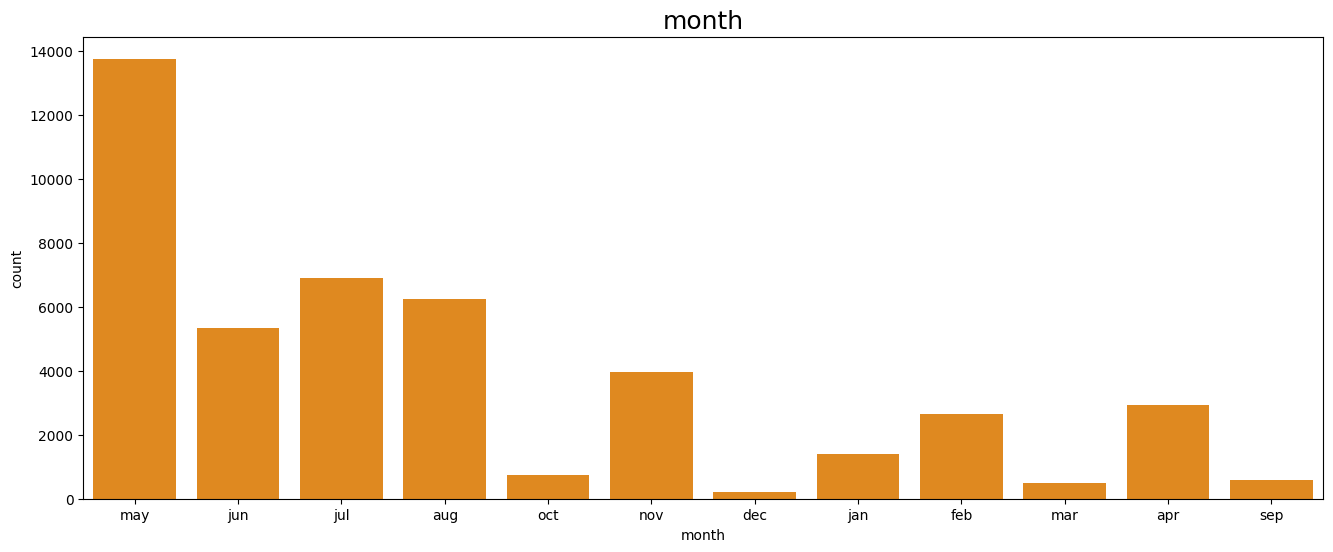

In [25]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['month'], color = 'DarkOrange')
plt.title('month', fontsize=18)
plt.show()

month :- last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

Data in month of may is high and less in Dec

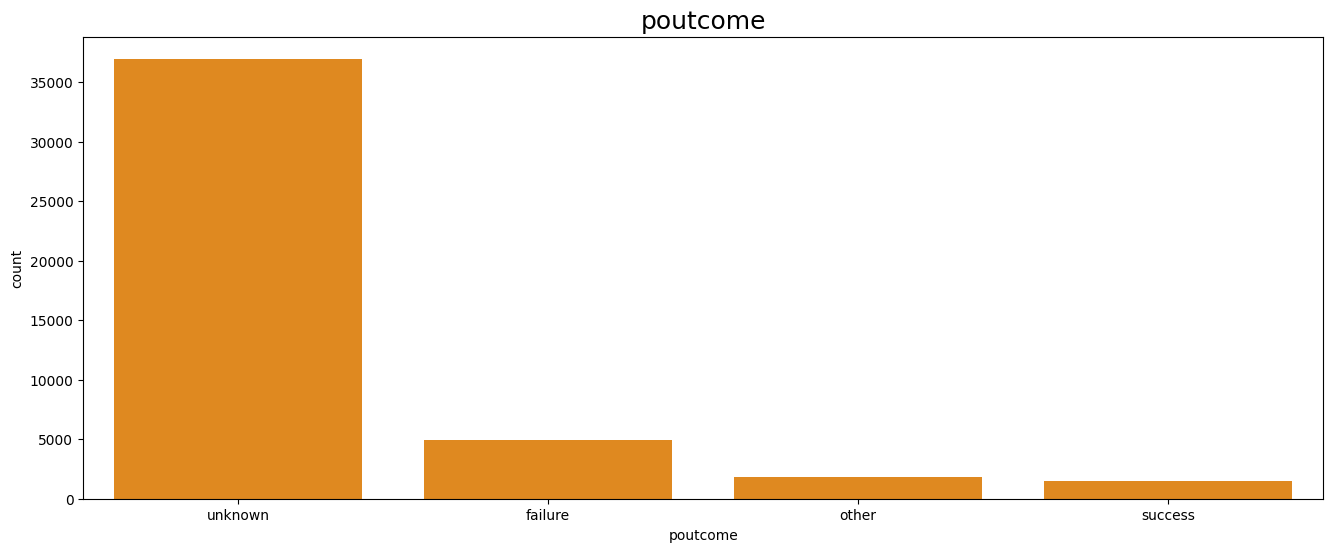

In [26]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['poutcome'], color = 'DarkOrange')
plt.title('poutcome', fontsize=18)
plt.show()

This feature indicates the outcome of the previous marketing campaign

Majority of the outcome of the previous campaign is Non-Existent. Very few people counts who successfully subscribed from previous marketing strategy.

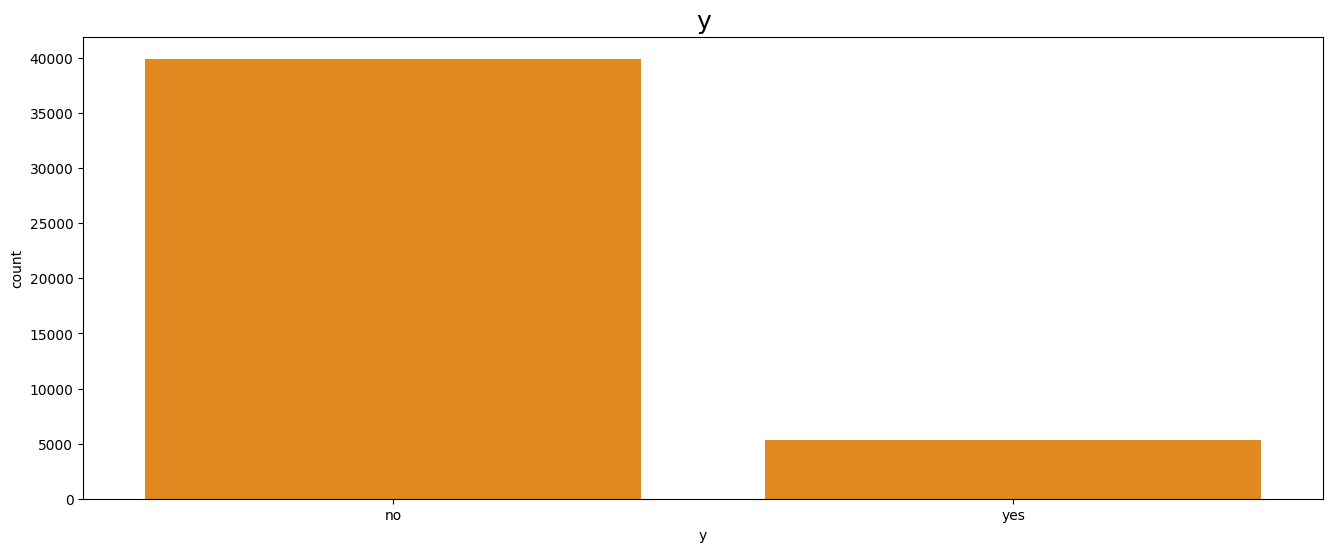

In [27]:
plt.figure(figsize = (16,6))
sns.countplot(x=df['y'], color = 'DarkOrange')
plt.title('y', fontsize=18)
plt.show()

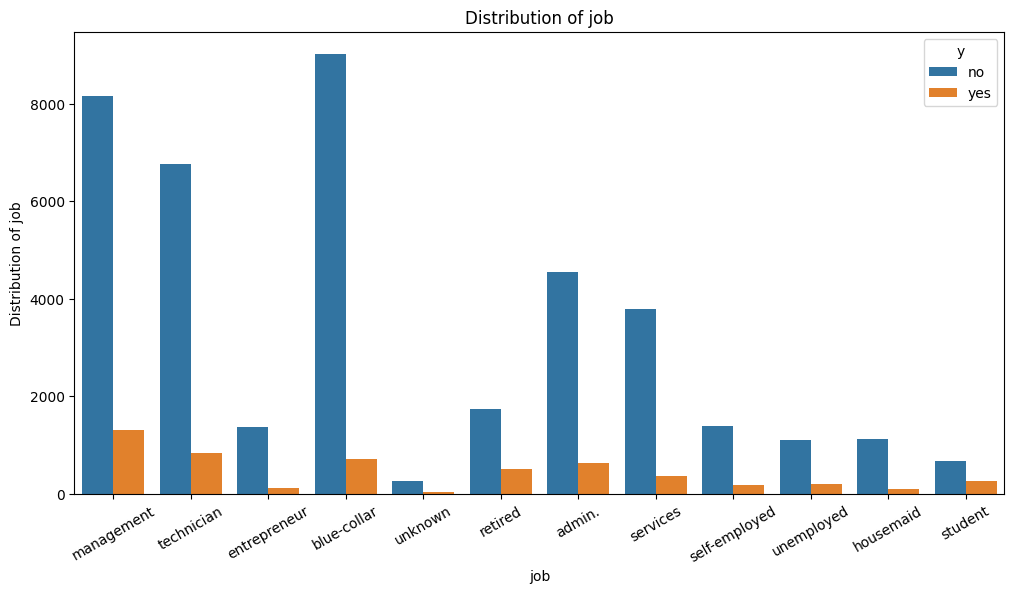

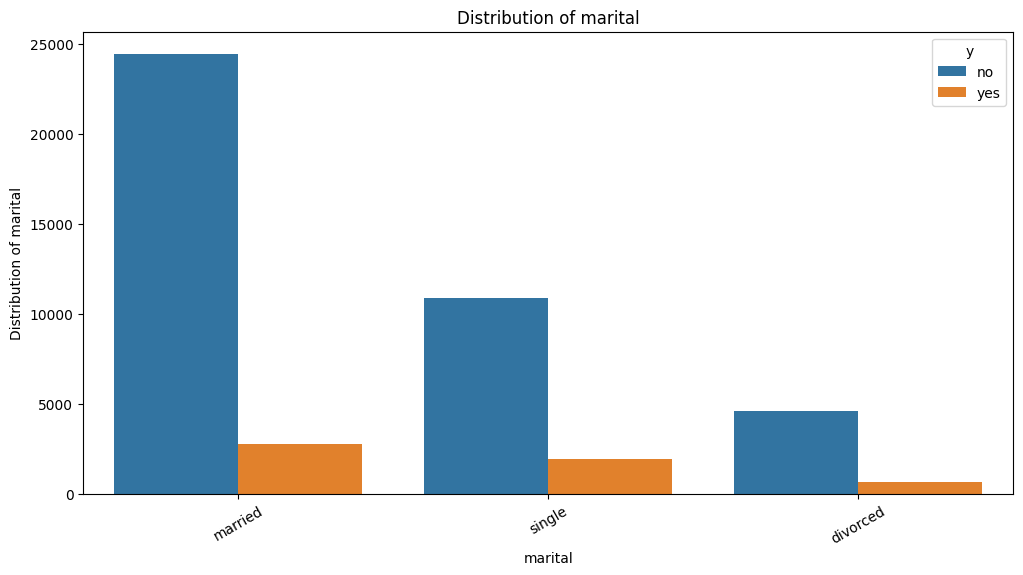

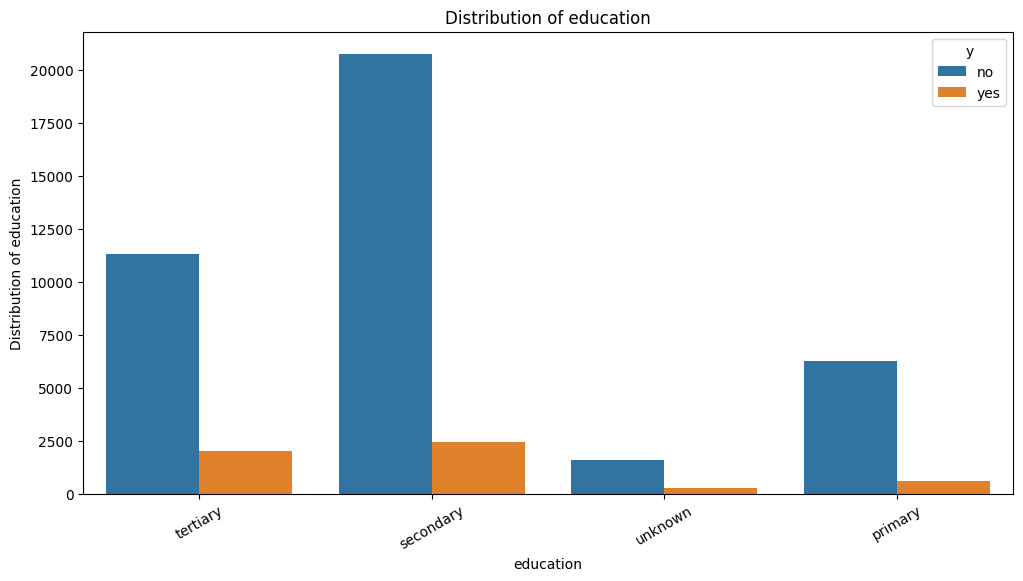

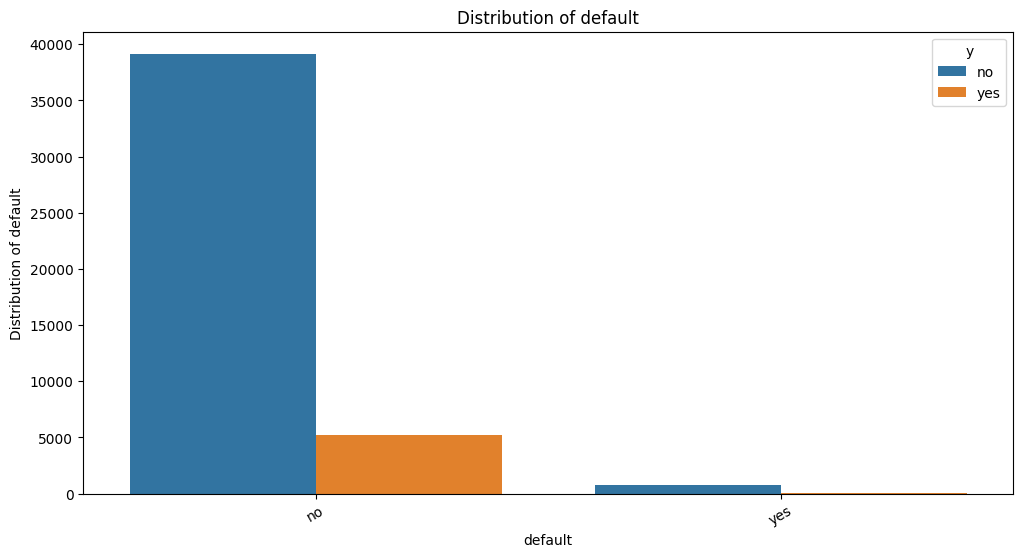

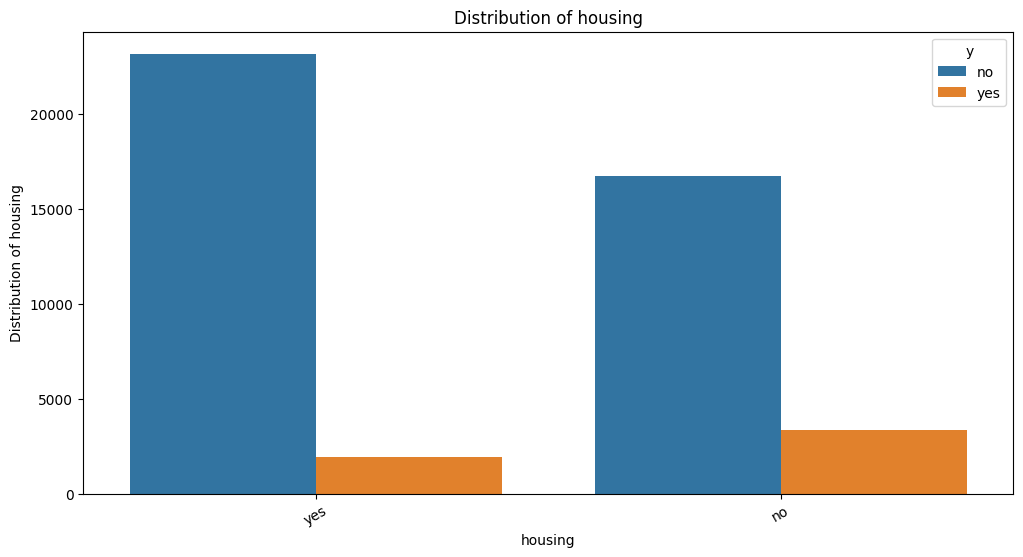

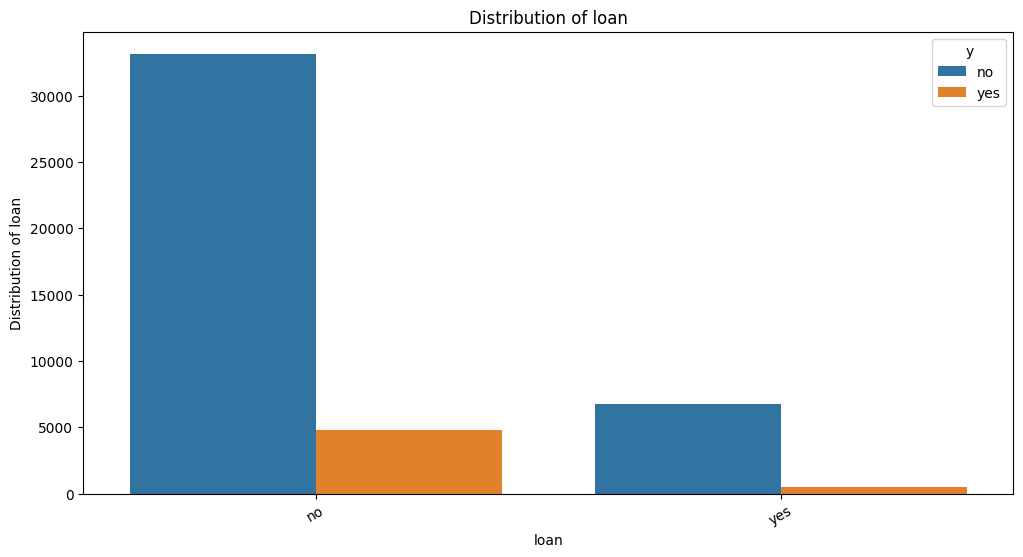

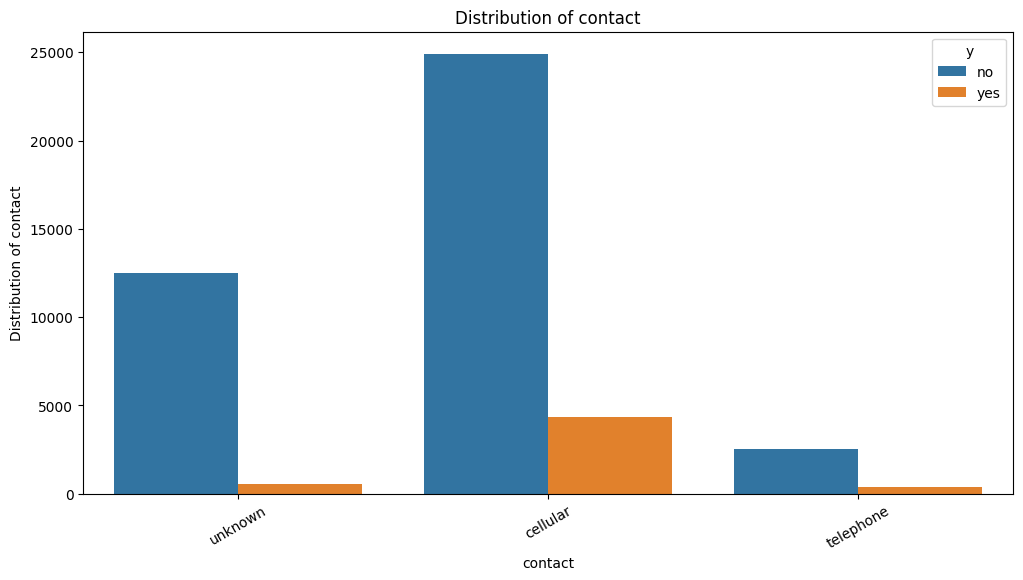

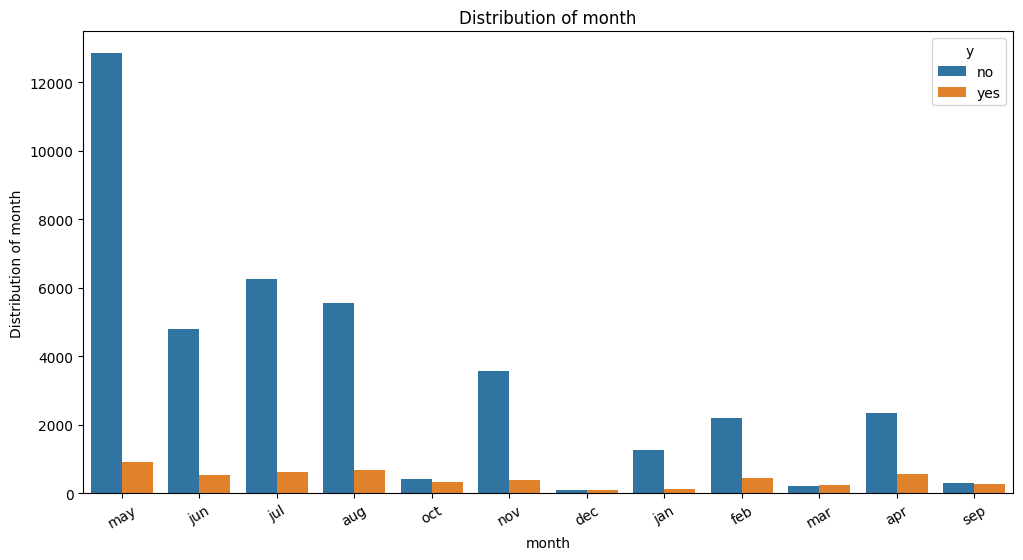

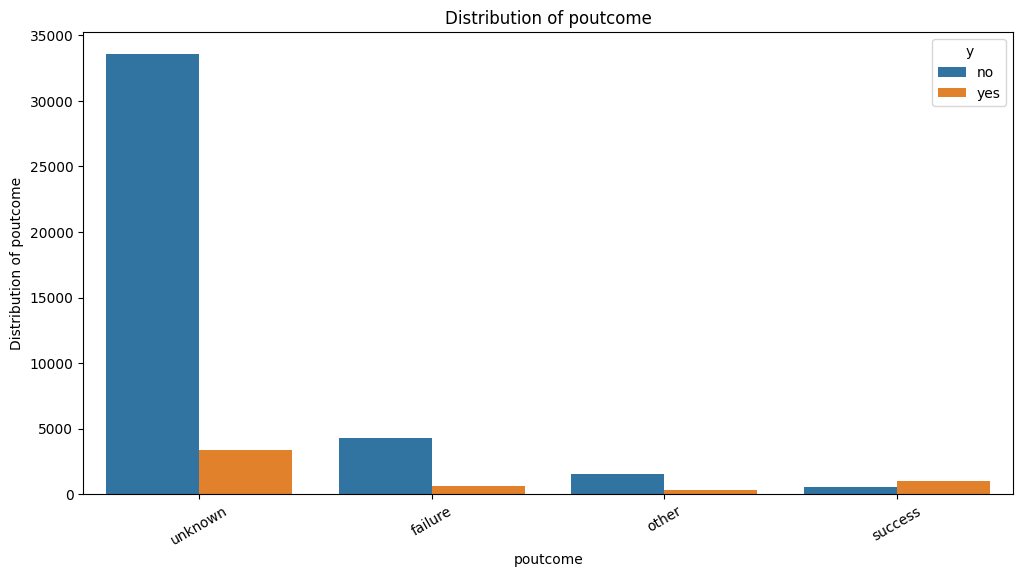

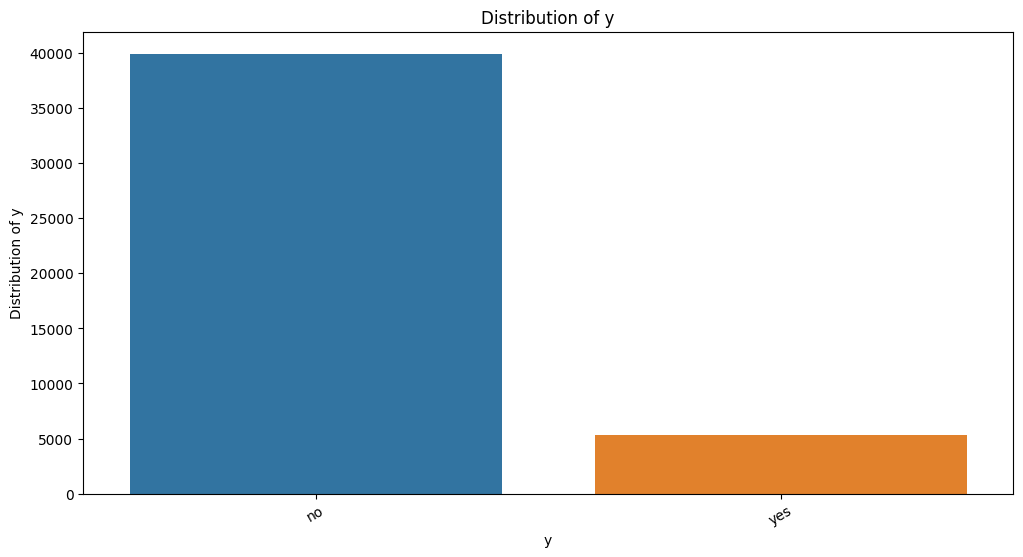

In [28]:
# Countplot of categorical features

for col in categorical_columns:
  plt.figure(figsize = (12,6))
  sns.countplot(x = df[col] , hue=df['y'])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.ylabel('Distribution of {}'.format(col))
  plt.title("Distribution of {}".format(col))
  plt.xticks(rotation=30)
  plt.show()

- From the above plots we can analyze that:

- Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.

- Success rate is highest for student.

- Most of the clients contacted have previous outcome as 'unknown'.

- Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.

- March has highest success rate.

- Most of the people are contacted through cellular.

- As seen for default variable, less client are contacted who have loan.

- Very few clients are contacted who are defaulter.

- Most of the people who are contacted have tertiray or secondary education.

- As we can see that married people are more tend to invest in product and have subscribed more in comparison to others

### Numerical Column Exploration

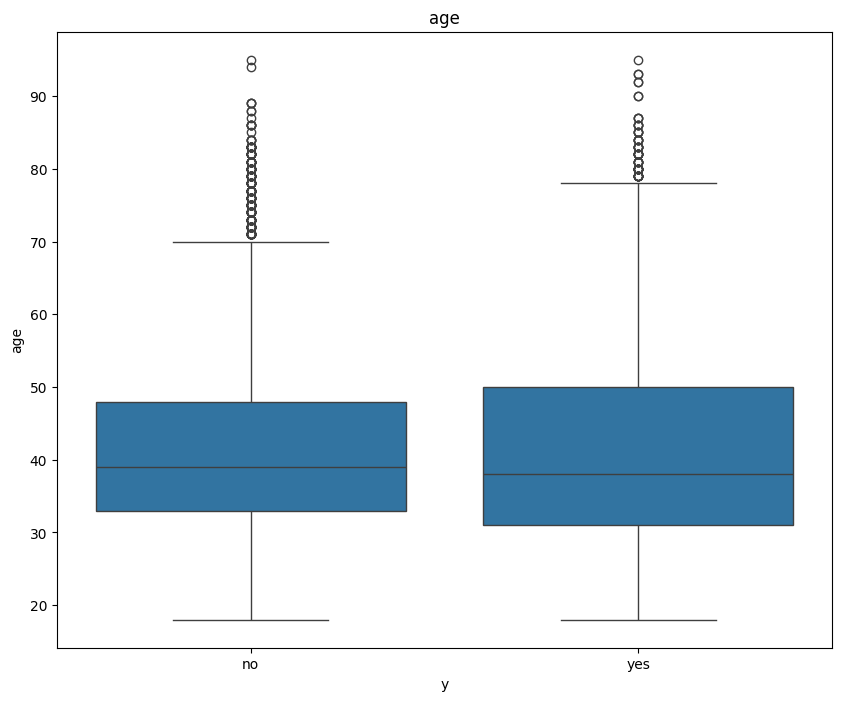

In [29]:
# Relation between Continous numerical Features and Labels
# boxplot to show target distribution with respect numerical features

plt.figure(figsize=(10,8))
sns.boxplot(y=df['age'], x=df['y'])
plt.title('age')
plt.xlabel('y')
plt.show()

In the above plot it is clear that a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles) and for each of the target variable the age feauture is not linearly seperable.Thus age will be of less importance to us.

As We can see that there are many Outliers in No part As well Yes Part but here our data is Imbalanced so we are keeping this Outliers

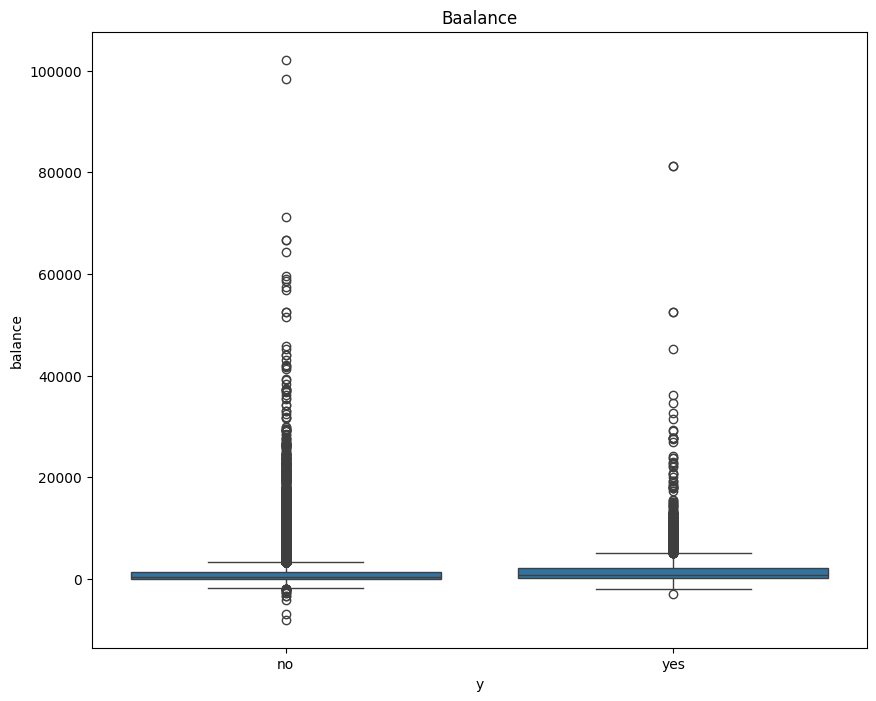

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['balance'], x=df['y'])
plt.title('Baalance')
plt.xlabel('y')
plt.show()

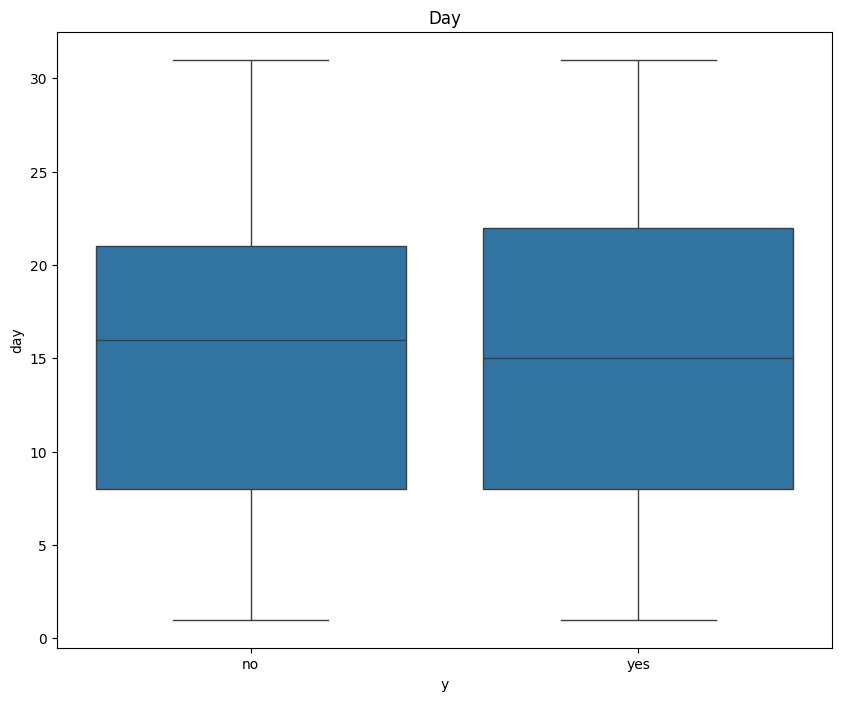

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['day'], x=df['y'])
plt.title('Day')
plt.xlabel('y')
plt.show()

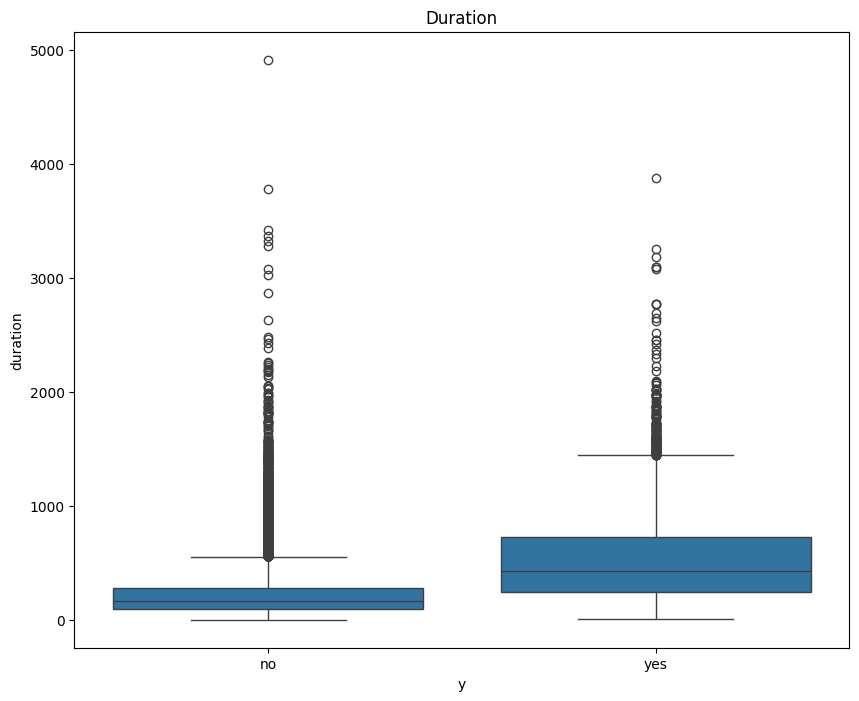

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Duration')
plt.xlabel('y')
plt.show()

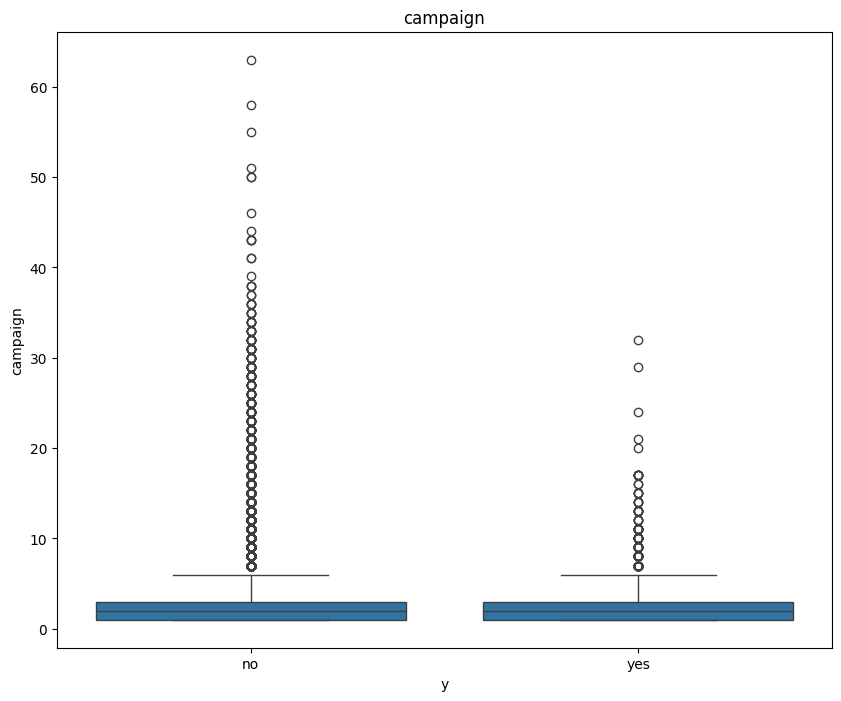

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['campaign'], x=df['y'])
plt.title('campaign')
plt.xlabel('y')
plt.show()

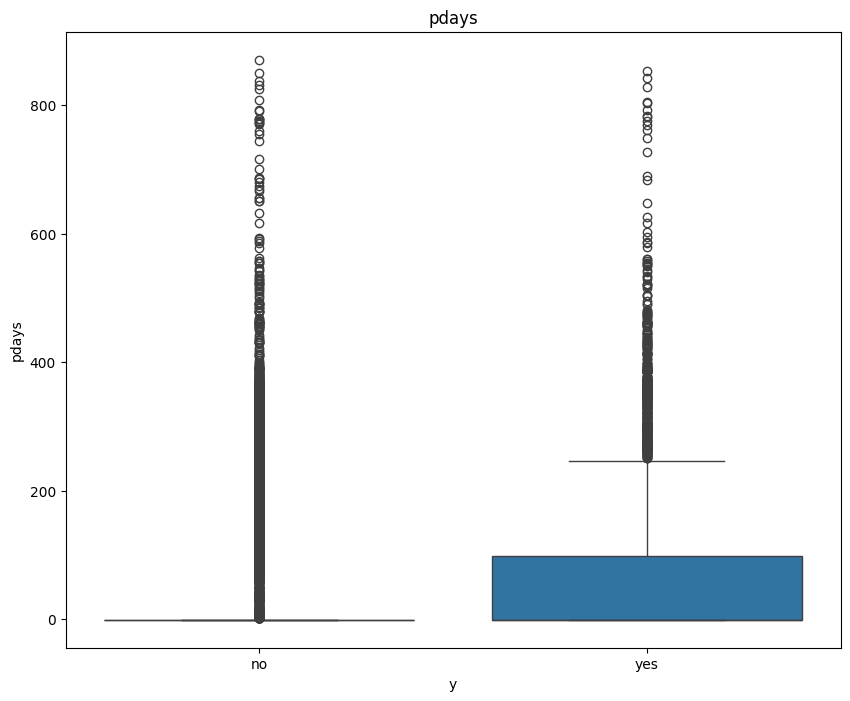

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['pdays'], x=df['y'])
plt.title('pdays')
plt.xlabel('y')
plt.show()

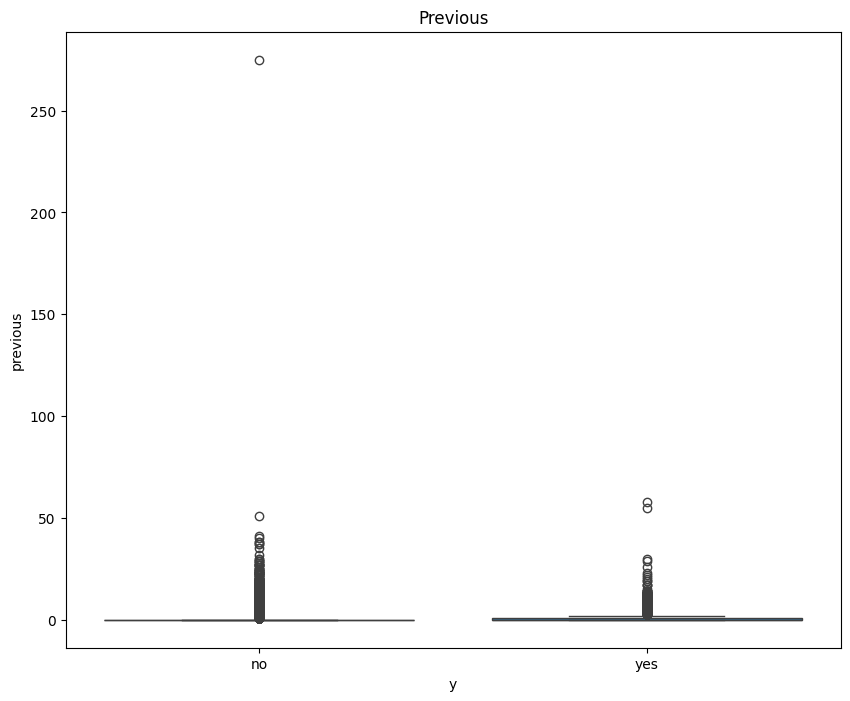

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Previous')
plt.xlabel('y')
plt.show()

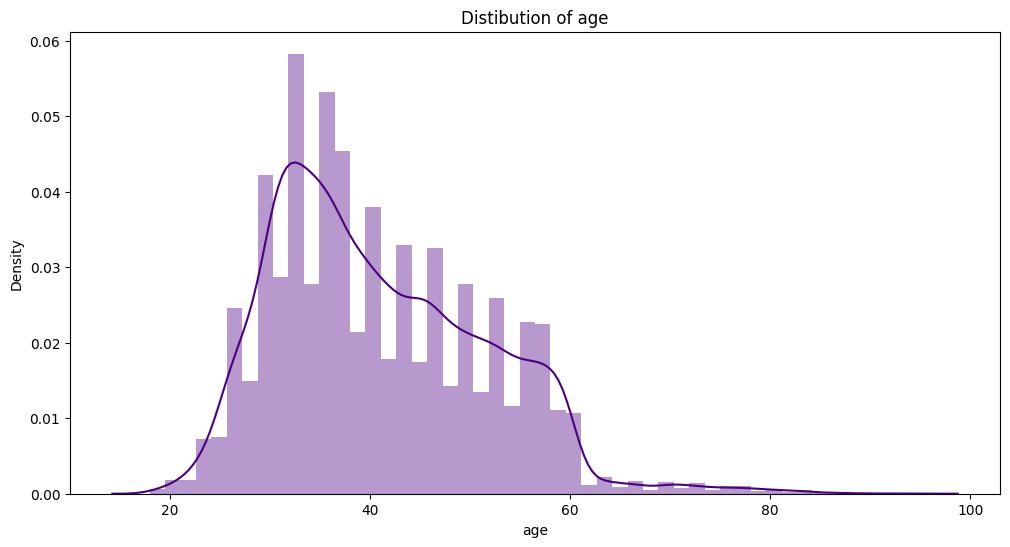

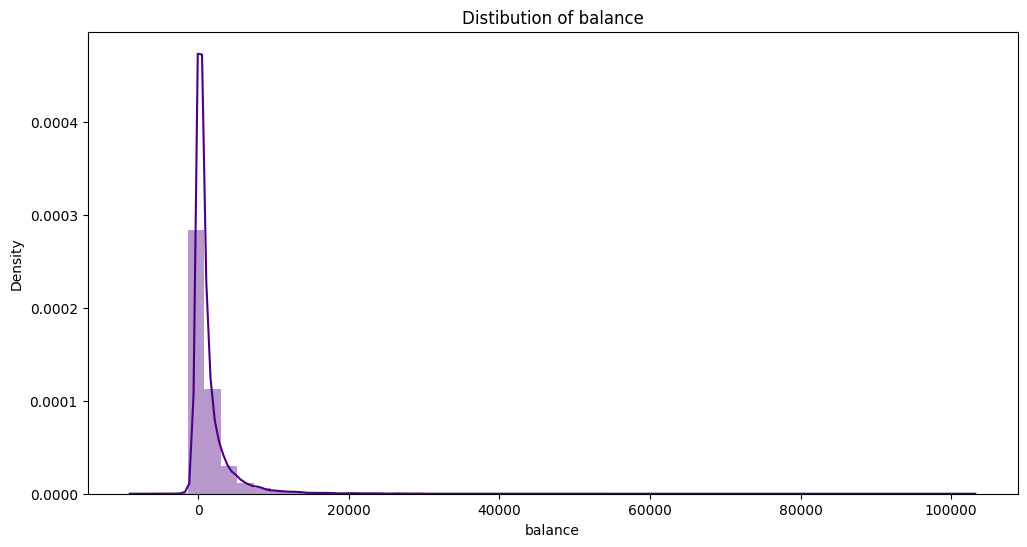

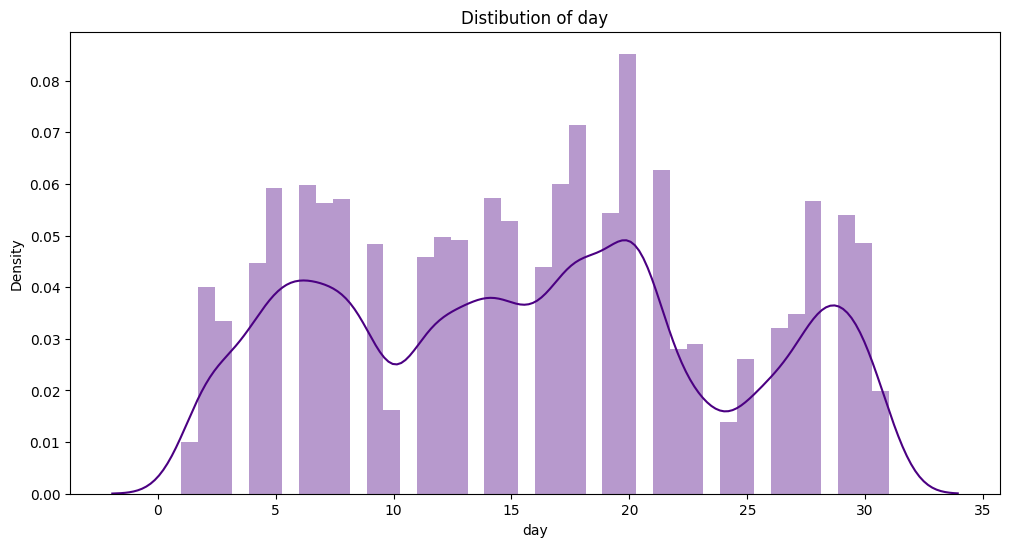

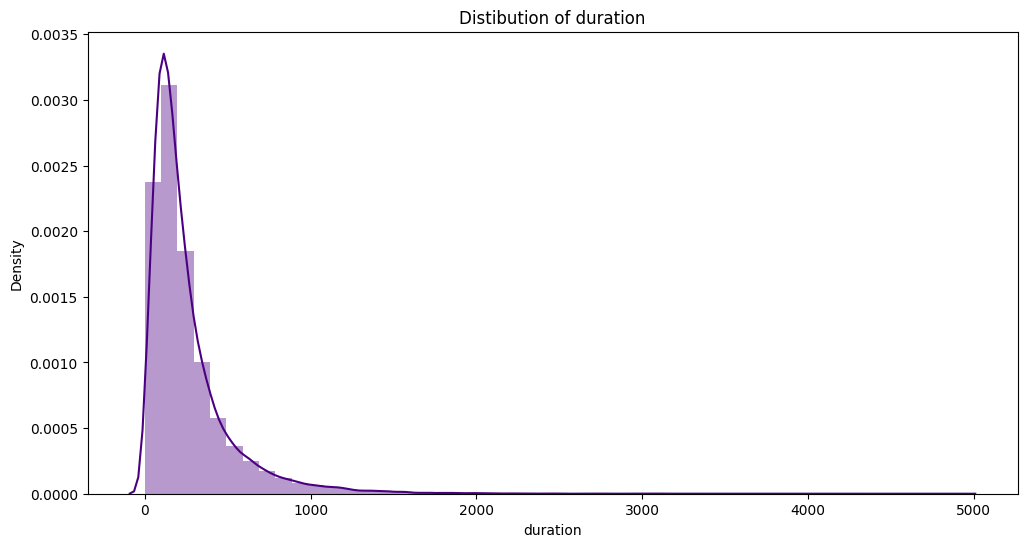

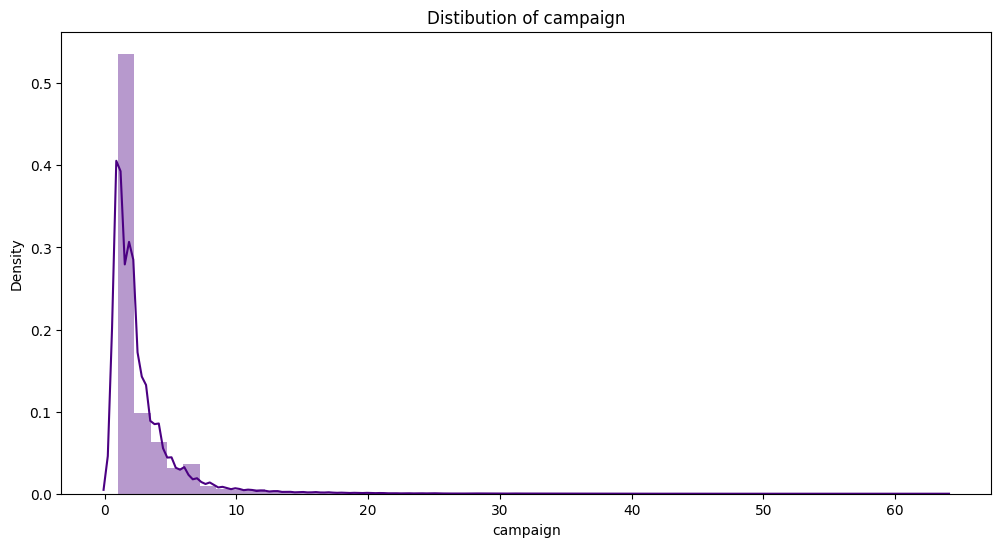

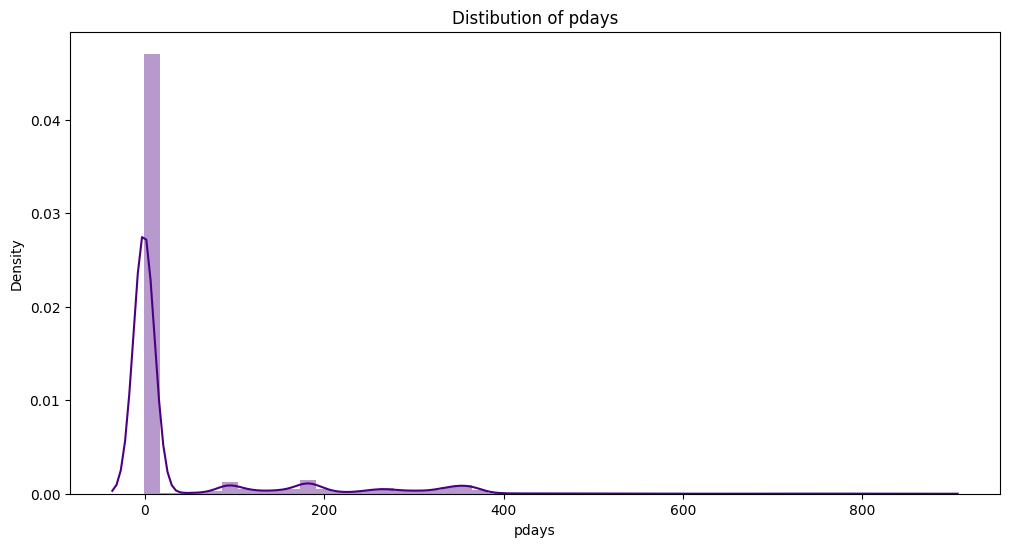

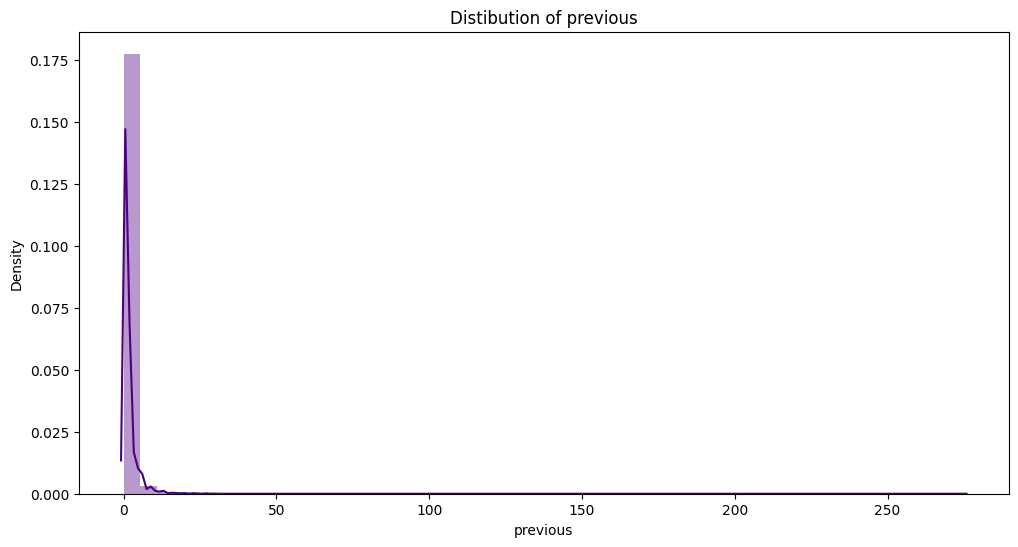

In [36]:
# plot a univariate distribution of continues observations
# Distibution plot of Numerical features

for col in numerical_columns:
  plt.figure(figsize=(12,6))
  sns.distplot(df[col], color='indigo')
  plt.title('Distibution of {}'. format(col))
  plt.show()

### **Take-away:**

it seems age, days distributed normally.

balance, duration, campaign, pdays and previous heavily skewed towards left and seems to be have some outliers.

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

###Correlation Matrix of the numerical features

In [37]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

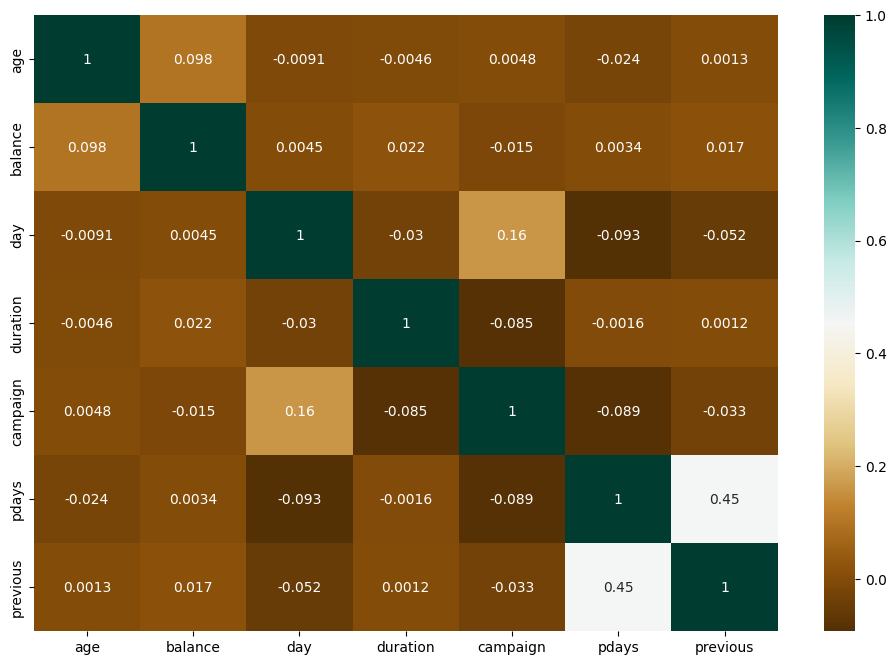

In [38]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap ='BrBG')

From the above heatmap we can see that there are some numerical features which share a high correlation between them.

# **Data Preprocessing**

In [39]:
df.shape

(45211, 17)

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We can see there are some binary columns(default, housing, loan) which are object type, we need to convert into numeric value.

There are categorical columns also, but there are a limited number of choices. They are job, marital, education, contact, month, and poutcome. That also need to converted into numerical format.

All feature columns we need to convert into numeric values then only we can feed into the model.

Convert default column into numeric value
We can convert the yes values to 1, and the no values to 0 for default column
We will lamda function for its

pandas.DataFrame.apply

DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs): Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1).

-- Creating one-hot encoding for non-numeric marital column

In [41]:
marital_dummies = pd.get_dummies(df['marital'], prefix= 'marital')
marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [42]:
# merge marital_dummies with marital column

pd.concat([df['marital'], marital_dummies], axis = 1).head()

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1


We can see in each of the rows there is one value of 1, which is in the column corresponding the value in the marital column.

There are three values, if two of the values in the dummy columns are 0 for a particular row, then the remaining column must be equal to 1. It is important to eliminate any redundancy and correlations in features as it becomes difficult to determine which feature is most important in minimizing the total error.

So let us remove one column divorced.

In [43]:
# Remove marital_divorced column
marital_dummies.drop('marital_divorced', axis =1, inplace = True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [44]:
# merge marital_dummies into main dataframe

df = pd.concat([df, marital_dummies], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


-- Creating one hot encoding for job column

In [45]:
job_dummies = pd.get_dummies(df['job'], prefix= 'job')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
job_dummies.drop('job_admin.', axis=1, inplace=True)

In [ ]:
# Merge job_dummies into main dataframe
df = pd.concat([df, job_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


-- Creating one hot encoding for education column

In [46]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.head()

,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [47]:
education_dummies.drop('education_primary', axis=1, inplace=True)

In [48]:
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,1,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,0,1,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,1,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,1,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,0,1,0,0,1


-- Creating one hot encoding for contact column

In [49]:
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
contact_dummies.head()

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [50]:
contact_dummies.drop('contact_cellular', axis=1, inplace=True)

In [51]:
df = pd.concat([df, contact_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,0,1,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,1,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,1,0,0,0,1,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,0,1,0,0,1,0,1


-- Creating one hot encoding for poutcome column

In [52]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [53]:
poutcome_dummies.drop('poutcome_failure', axis=1, inplace=True)

In [54]:
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,1,0,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,1,0,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,1,0,0,1



-- Convert month column into numeric value

In [55]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)
df['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [56]:
df[df['pdays'] == -1]['pdays'].count()

36954

In [57]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)
df[['pdays','was_contacted']].head()

,pdays,was_contacted
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


-- Convert default column into numeric value

In [58]:
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0 )

In [59]:
# Vie w default and is_default columns together

df[['default', 'is_default']].tail()

,default,is_default
45206,no,0
45207,no,0
45208,no,0
45209,no,0
45210,no,0


-- Convert housing column into numeric value

In [60]:
df['is_housing'] = df['housing'].apply(lambda row : 1 if row == 'yes' else 0)

In [61]:
# Veiw housing  and is_housing columns together

df[['housing', 'is_housing']].head()

,housing,is_housing
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0


-- Convert loan column into numeric value

In [62]:
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [63]:
# Veiw loan and is_loan columns together

df[['loan', 'is_loan']].head()

,loan,is_loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0


-- Convert target column ‘y’ into numeric value

In [64]:
df['target'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)

In [65]:
# Veiw y and target columns together
df[['y', 'target']].head()

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,0,0,0,0


-- Delete job, education, default, housing, loan, contact, month, pdays, Marital, duration, age, day, poutcome, y columns

In [67]:
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y','month','duration','age','day'], axis=1, inplace=True)

In [68]:
df.dtypes

balance                int64
campaign               int64
pdays                  int64
previous               int64
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
was_contacted          int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
dtype: object

In [69]:
# remove the outlier using IsolationForest Technique
from sklearn.ensemble import IsolationForest

In [70]:
features = df.drop(['target'],axis=1)

anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(features))
df['is_anomaly'] = anomalies
df = df[df['is_anomaly']==1].drop(['is_anomaly'],axis=1)

In [71]:
df.shape

(40690, 19)

In [72]:
# Assigning values to independent variables
X = df.drop('target', axis = 1)
X.head()

,balance,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan
0,2143,1,-1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,29,1,-1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,2,1,-1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
3,1506,1,-1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
5,231,1,-1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [73]:
# Assigning the values of dependent variables
y = df['target']
y.head()

0    0
1    0
2    0
3    0
5    0
Name: target, dtype: int64

In [74]:
# Over sampling the data using SMOTE

from imblearn.over_sampling import SMOTE


In [75]:
sampler = SMOTE()
X,y = sampler.fit_resample(X.values, y.values)

### **SMOTE :-**

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE

In [76]:
X.shape

(73074, 18)

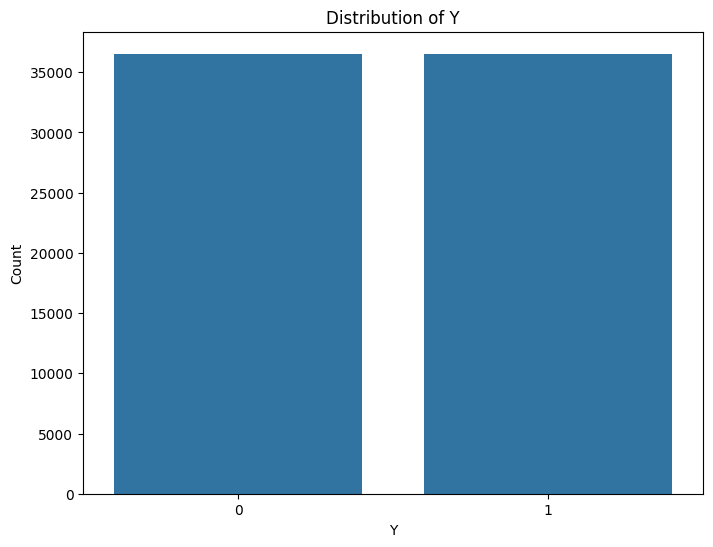

In [77]:
# countplot of dependent column y

plt.figure(figsize = (8,6))
sns.countplot(x =y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title('Distribution of Y')
plt.show()

### **Train-Test Split**

In [78]:
# Scale the data using Standard Scaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [79]:
# Splitting the data into train and test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state =42)

In [80]:
print(X_train.shape)

(54805, 18)


In [81]:
print(y_train.shape)

(54805,)


In [82]:
print(X_test.shape)

(18269, 18)


In [83]:
print(y_test.shape)

(18269,)


# **Models Implementation**

**Logistic Regression**

**Decision Tree**

**XGBoost Classifier**

**K - Nearest Neighbors**

# **Logistic Regression**

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category.

In [84]:
# fitting model to logistic regression
logistic_model = LogisticRegression(fit_intercept = True, max_iter = 10000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [85]:
# get the model coefficients
logistic_model.coef_

array([[-0.01567071, -0.50778321, -0.10629399,  0.02381835, -0.94978149,
        -0.66834781, -0.77263876, -0.75414501, -0.35578412, -0.31845533,
        -0.88203086, -0.11828087,  0.22739577, -1.56770096, -1.40407275,
        -0.13335088, -0.64597613, -0.49462517]])

In [86]:
#Get the model intercept
logistic_model.intercept_

array([-0.04564509])

In [87]:
#Get the predicted probabilities
train_preds = logistic_model.predict_proba(X_train)
test_preds = logistic_model.predict_proba(X_test)


In [88]:
# Get the predicted classes
train_class_preds = logistic_model.predict(X_train)
test_class_preds = logistic_model.predict(X_test)

In [89]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print(round((train_accuracy), 4))
print(round((test_accuracy), 4))

0.8143
0.8087


In [90]:
log_train_preds = logistic_model.predict_proba(X_train)[:,1]
log_test_preds = logistic_model.predict_proba(X_test)[:,1]

In [91]:
from sklearn.metrics import roc_auc_score

print(round(roc_auc_score(y_train,log_train_preds), 4))
print(round(roc_auc_score(y_test,log_test_preds), 4))


0.8957
0.8913


In [92]:
from sklearn.metrics import classification_report
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.78      0.83      0.81     25633
          no       0.85      0.80      0.82     29172

    accuracy                           0.81     54805
   macro avg       0.81      0.82      0.81     54805
weighted avg       0.82      0.81      0.81     54805



              precision    recall  f1-score   support

         yes       0.78      0.83      0.80      8627
          no       0.84      0.79      0.81      9642

    accuracy                           0.81     18269
   macro avg       0.81      0.81      0.81     18269
weighted avg       0.81      0.81      0.81     18269



In [93]:
# Hyperprarameter tuning using GridSearchCV

logistic_grid = LogisticRegression()
parameters = {'C': [1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,100,1e-3,1e+4,1e+5,1e+6]}
log_grid = GridSearchCV(logistic_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END .......................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5,
                               10, 100, 0.001, 10000.0, 100000.0, 1000000.0]},
             scoring='roc_auc', verbose=2)

In [94]:
log_optimal_model = log_grid.best_estimator_

In [95]:
# Making predictions on train and test data

train_class_preds = log_optimal_model.predict(X_train)
test_class_preds = log_optimal_model.predict(X_test)

In [96]:
# Calculating accuracy on train and test
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_test_accuracy = accuracy_score(y_test,test_class_preds)

print(round((log_train_accuracy),4))
print(round((log_test_accuracy), 4))


0.8132
0.8096


In [97]:
log_optimal_train_preds = log_optimal_model.predict_proba(X_train)[:,1]
log_optimal_test_preds = log_optimal_model.predict_proba(X_test)[:,1]

In [98]:
print(round((roc_auc_score(y_train,log_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,log_optimal_test_preds)), 4))

0.896
0.8916


In [99]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))


              precision    recall  f1-score   support

         yes       0.78      0.83      0.81     25591
          no       0.85      0.80      0.82     29214

    accuracy                           0.81     54805
   macro avg       0.81      0.81      0.81     54805
weighted avg       0.82      0.81      0.81     54805



              precision    recall  f1-score   support

         yes       0.78      0.83      0.80      8621
          no       0.84      0.79      0.81      9648

    accuracy                           0.81     18269
   macro avg       0.81      0.81      0.81     18269
weighted avg       0.81      0.81      0.81     18269



# **Decision Tree**

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [100]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
# Get the predicted classes
train_class_preds = tree_model.predict(X_train)
test_class_preds = tree_model.predict(X_test)

In [102]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print(round((train_accuracy), 4))
print(round((test_accuracy), 4))

0.9783
0.8569


In [103]:
tree_train_preds = tree_model.predict_proba(X_train)[:,1]
tree_test_preds = tree_model.predict_proba(X_test)[:,1]

In [104]:
print(round((roc_auc_score(y_train,tree_train_preds)), 4))
print(round((roc_auc_score(y_test,tree_test_preds)), 4))

0.9989
0.8679


In [105]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.98      0.98      0.98     27290
          no       0.98      0.98      0.98     27515

    accuracy                           0.98     54805
   macro avg       0.98      0.98      0.98     54805
weighted avg       0.98      0.98      0.98     54805



              precision    recall  f1-score   support

         yes       0.83      0.88      0.85      8771
          no       0.88      0.84      0.86      9498

    accuracy                           0.86     18269
   macro avg       0.86      0.86      0.86     18269
weighted avg       0.86      0.86      0.86     18269



In [106]:
#Hyperprarameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
tree_grid = DecisionTreeClassifier()
parameters = {
                'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]

}
tree_grid = GridSearchCV(tree_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.1s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc', verbose=2)

In [107]:
tree_optimal_model = tree_grid.best_estimator_

In [108]:
# Making predictions on train and test data

train_class_preds = tree_optimal_model.predict(X_train)
test_class_preds = tree_optimal_model.predict(X_test)

In [109]:
# Calculating accuracy on train and test
tree_train_accuracy = accuracy_score(y_train,train_class_preds)
tree_test_accuracy = accuracy_score(y_test,test_class_preds)

print(round((tree_train_accuracy),4))
print(round((tree_test_accuracy), 4))

0.8321
0.8157


In [110]:
tree_optimal_train_preds = tree_optimal_model.predict_proba(X_train)[:,1]
tree_optimal_test_preds = tree_optimal_model.predict_proba(X_test)[:,1]

In [111]:
print(round((roc_auc_score(y_train,tree_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,tree_optimal_test_preds)), 4))

0.9138
0.8968


In [112]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.85      0.82      0.83     28080
          no       0.82      0.84      0.83     26725

    accuracy                           0.83     54805
   macro avg       0.83      0.83      0.83     54805
weighted avg       0.83      0.83      0.83     54805



              precision    recall  f1-score   support

         yes       0.83      0.81      0.82      9532
          no       0.80      0.83      0.81      8737

    accuracy                           0.82     18269
   macro avg       0.82      0.82      0.82     18269
weighted avg       0.82      0.82      0.82     18269



In [113]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [114]:
features.columns

Index(['balance', 'campaign', 'pdays', 'previous', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'was_contacted', 'is_default', 'is_housing', 'is_loan'],
      dtype='object')

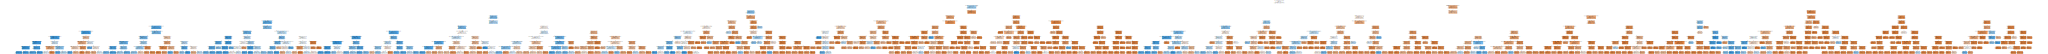

<Figure size 200x200 with 0 Axes>

In [115]:
plt.figure(figsize=(2,2))
graph = Source(tree.export_graphviz(tree_optimal_model, out_file=None, feature_names=features.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

In [116]:
importances = tree_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
16,is_housing,0.30
10,contact_unknown,0.16
5,marital_single,0.09
1,campaign,0.08
4,marital_married,0.08
17,is_loan,0.07
0,balance,0.06
6,education_secondary,0.06
7,education_tertiary,0.04
8,education_unknown,0.02


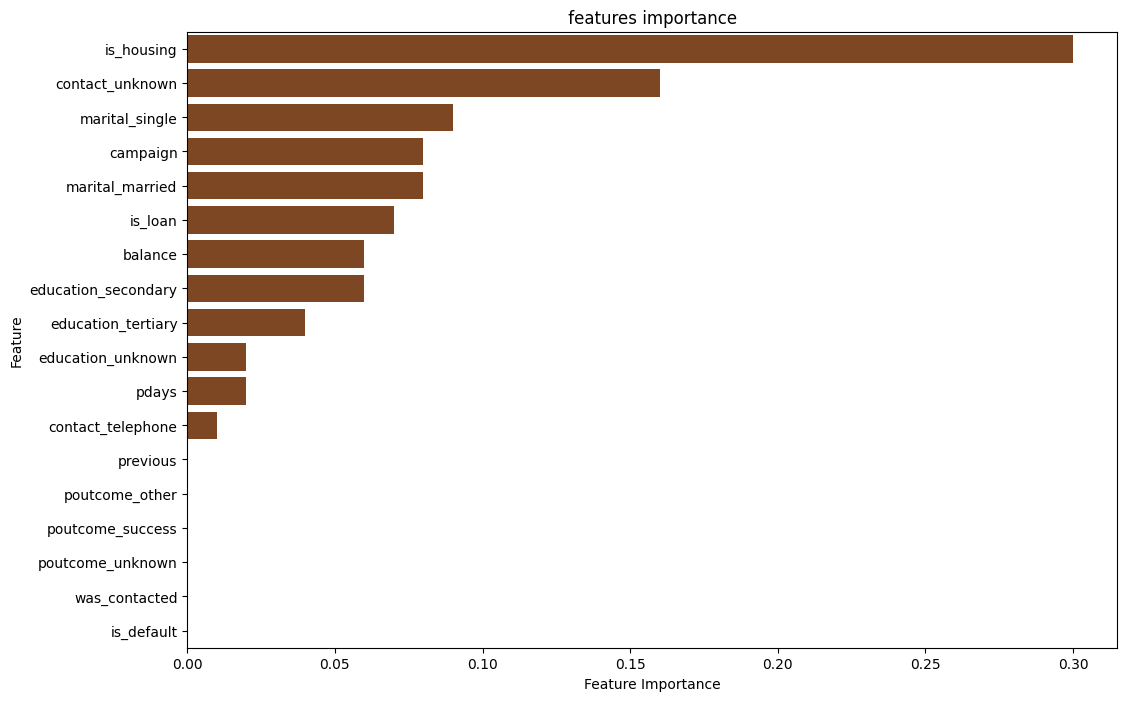

In [117]:
plt.figure(figsize=(12,8))
plt.title(' features importance ')
sns.barplot(x='Feature Importance', y="Feature", color = 'saddlebrown', data=fim_gb_df)
plt.show()

# **XGBoost Classifier**

XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction. Just like in Random Forests, XGBoost uses Decision Trees as base learners: Image by the author. Decision tree to predict rain.

In [118]:
import xgboost as xgb

In [119]:
XGBoost_model = xgb.XGBClassifier()
XGBoost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
# Get the predicted classes

train_class_preds = XGBoost_model.predict(X_train)
test_class_preds = XGBoost_model.predict(X_test)

In [121]:
# Get the Accuracy classes

train_accuracy = accuracy_score(train_class_preds, y_train)
test_accuracy = accuracy_score(test_class_preds, y_test)

In [122]:
print(round((train_accuracy), 4))

0.8603


In [123]:
print(round((test_accuracy), 4))

0.8398


In [124]:
XGBoost_train_preds =  XGBoost_model.predict_proba(X_train)[:, 1]
XGBoost_test_preds =  XGBoost_model.predict_proba(X_test)[:, 1]

In [125]:
print(round((roc_auc_score(y_train,XGBoost_train_preds )), 4))

0.9386


In [126]:
print(round((roc_auc_score(y_test,XGBoost_test_preds )), 4))

0.9192


In [127]:
target_names = ['yes', 'no']
print(classification_report(train_class_preds, y_train, target_names= target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names= target_names))

              precision    recall  f1-score   support

         yes       0.88      0.85      0.86     28162
          no       0.85      0.87      0.86     26643

    accuracy                           0.86     54805
   macro avg       0.86      0.86      0.86     54805
weighted avg       0.86      0.86      0.86     54805



              precision    recall  f1-score   support

         yes       0.86      0.83      0.84      9525
          no       0.82      0.85      0.84      8744

    accuracy                           0.84     18269
   macro avg       0.84      0.84      0.84     18269
weighted avg       0.84      0.84      0.84     18269



In [128]:
# Hyperparameter tuning using GridSearch
XGBoost_grid = xgb.XGBClassifier()
parameters = {
                'n_estimators' : [50,80,100,125],
              'max_depth' : [3,5,7,9],
              'learning_rate': [0.01,0.1,0.3,0.5]
              }
XGBoost_grid = GridSearchCV(XGBoost_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
XGBoost_grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 80, 100, 125]},
             scoring='roc_auc', verbose=2)

In [129]:
XGBoost_optimal_model =XGBoost_grid.best_estimator_

In [130]:
# Making predictions on train and test data

train_class_preds = XGBoost_optimal_model.predict(X_train)
test_class_preds = XGBoost_optimal_model.predict(X_test)

In [131]:
# Calculating accuracy on train and test

XGBoost_train_accuracy = accuracy_score(y_train,train_class_preds)
XGBoost_test_accuracy = accuracy_score(y_test,test_class_preds)

In [132]:
print(round((XGBoost_train_accuracy), 4))
print(round((XGBoost_test_accuracy), 4))

0.9171
0.8653


In [133]:
XGBoost_optimal_train_preds = XGBoost_optimal_model.predict_proba(X_train)[:, 1]
XGBoost_optimal_test_preds = XGBoost_optimal_model.predict_proba(X_test)[:, 1]

In [134]:
target_names = ['yes', 'no']
print(classification_report( train_class_preds, y_train, target_names = target_names))
print('\n')
print(classification_report( test_class_preds, y_test, target_names = target_names))

              precision    recall  f1-score   support

         yes       0.91      0.92      0.92     27177
          no       0.92      0.92      0.92     27628

    accuracy                           0.92     54805
   macro avg       0.92      0.92      0.92     54805
weighted avg       0.92      0.92      0.92     54805



              precision    recall  f1-score   support

         yes       0.86      0.87      0.87      9133
          no       0.87      0.86      0.86      9136

    accuracy                           0.87     18269
   macro avg       0.87      0.87      0.87     18269
weighted avg       0.87      0.87      0.87     18269



In [135]:
importances = XGBoost_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
10,contact_unknown,0.17
8,education_unknown,0.13
17,is_loan,0.11
16,is_housing,0.11
9,contact_telephone,0.07
13,poutcome_unknown,0.06
5,marital_single,0.05
4,marital_married,0.04
11,poutcome_other,0.04
14,was_contacted,0.04


<Axes: title={'center': ' features importance '}, xlabel='Feature Importance', ylabel='Feature'>

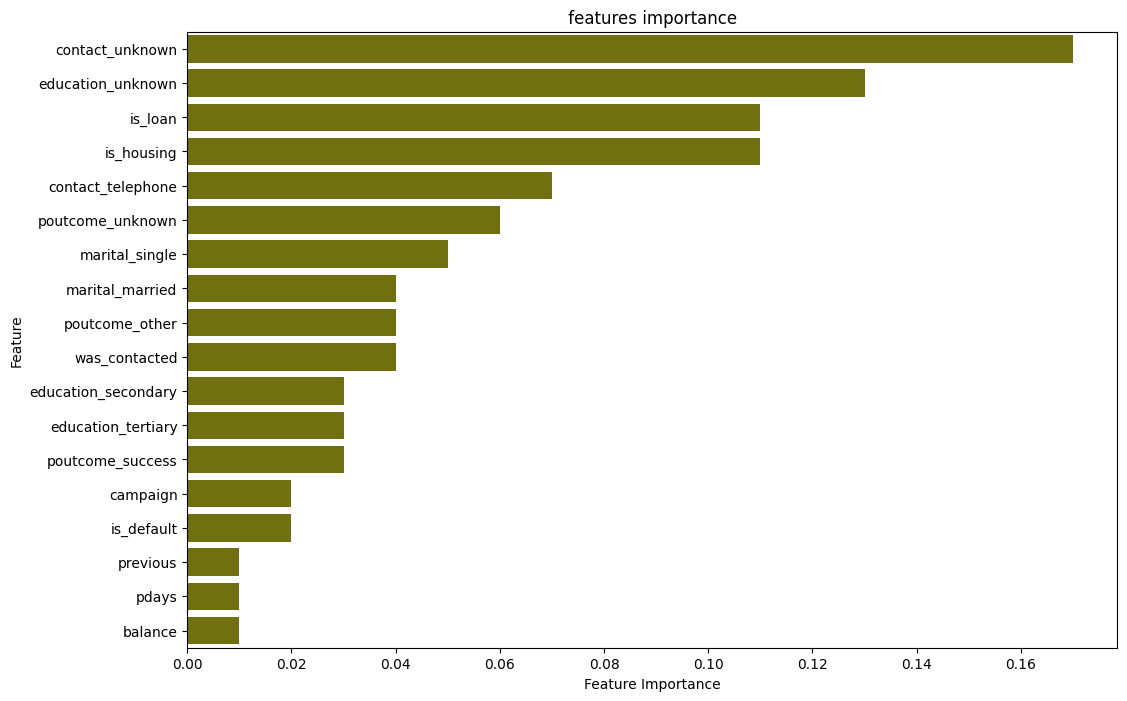

In [136]:
plt.figure(figsize=(12,8))
plt.title(' features importance ')
sns.barplot(x='Feature Importance',y="Feature", color = 'olive', data=fim_gb_df)

# **K-Nearest Neighbors (KNN)**

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

The first determining property of machine learning algorithms is the split between supervised and unsupervised models. The difference between supervised and unsupervised models is the problem statement.

In supervised models, you have two types of variables at the same time:

A target variable, which is also called the dependent variable or the y variable.
Independent variables, which are also known as x variables or explanatory variables.

In [137]:
# Setup a knn classifier with k neighbors
KNN_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [138]:
train_class_preds = KNN_model.predict(X_train)
test_class_preds = KNN_model.predict(X_test)

In [139]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

In [140]:
print(round((train_accuracy),4))
print(round((test_accuracy),4))

0.9051
0.8487


In [141]:
KNN_train_preds = KNN_model.predict_proba(X_train)[:,1]
KNN_test_preds = KNN_model.predict_proba(X_test)[:,1]

In [142]:
print(round((roc_auc_score(y_train,KNN_train_preds)), 4))
print(round((roc_auc_score(y_test,KNN_test_preds)), 4))


0.9709
0.8949


In [143]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.92      0.90     26379
          no       0.92      0.89      0.91     28426

    accuracy                           0.91     54805
   macro avg       0.91      0.91      0.91     54805
weighted avg       0.91      0.91      0.91     54805



              precision    recall  f1-score   support

         yes       0.83      0.87      0.85      8770
          no       0.87      0.83      0.85      9499

    accuracy                           0.85     18269
   macro avg       0.85      0.85      0.85     18269
weighted avg       0.85      0.85      0.85     18269



In [144]:
#Hyperprarameter tuning using GridSearchCV

KNN_grid = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,50,2)}
KNN_grid = GridSearchCV(KNN_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
KNN_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................................n_neighbors=1; total time=   2.5s
[CV] END ......................................n_neighbors=1; total time=   6.4s
[CV] END ......................................n_neighbors=1; total time=   3.7s
[CV] END ......................................n_neighbors=1; total time=   2.4s
[CV] END ......................................n_neighbors=1; total time=   2.4s
[CV] END ......................................n_neighbors=3; total time=   3.2s
[CV] END ......................................n_neighbors=3; total time=   3.7s
[CV] END ......................................n_neighbors=3; total time=   2.4s
[CV] END ......................................n_neighbors=3; total time=   2.5s
[CV] END ......................................n_neighbors=3; total time=   2.4s
[CV] END ......................................n_neighbors=5; total time=   2.8s
[CV] END ......................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='roc_auc', verbose=2)

In [145]:
KNN_grid.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [146]:
KNN_optimal_model = KNN_grid.best_estimator_

In [147]:
# Making predictions on train and test data

train_class_preds = KNN_optimal_model.predict(X_train)
test_class_preds = KNN_optimal_model.predict(X_test)

In [148]:
# Calculating accuracy on train and test
KNN_train_accuracy = accuracy_score(y_train,train_class_preds)
KNN_test_accuracy = accuracy_score(y_test,test_class_preds)

In [149]:
print(round((KNN_train_accuracy), 4))
print(round((KNN_test_accuracy), 4))

0.8434
0.8239


In [150]:
KNN_optimal_train_preds = KNN_optimal_model.predict_proba(X_train)[:,1]
KNN_optimal_test_preds = KNN_optimal_model.predict_proba(X_test)[:,1]

In [151]:
print(round((roc_auc_score(y_train,KNN_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,KNN_optimal_test_preds)), 4))

0.9279
0.901


In [152]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.84      0.84      0.84     27297
          no       0.84      0.84      0.84     27508

    accuracy                           0.84     54805
   macro avg       0.84      0.84      0.84     54805
weighted avg       0.84      0.84      0.84     54805

              precision    recall  f1-score   support

         yes       0.83      0.83      0.83      9206
          no       0.82      0.82      0.82      9063

    accuracy                           0.82     18269
   macro avg       0.82      0.82      0.82     18269
weighted avg       0.82      0.82      0.82     18269



# **Conclusion**

- For age , most of the customers are in the age range of 30-40.

- For balance , above 1000$ is like to subscribe a term deposite .

- The model can help to classify the customers on the basis on which they deposit or not

- The model helps to target the right customer rather than wasting time on wrong customer

- Comparing to all algorithms XGboost algorithm has best accuracy score and ROC-AUC score . So it is concluded as optimal model.